In [56]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline


In [57]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

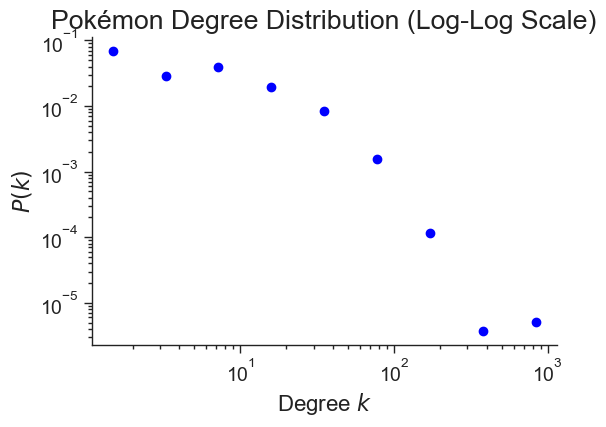

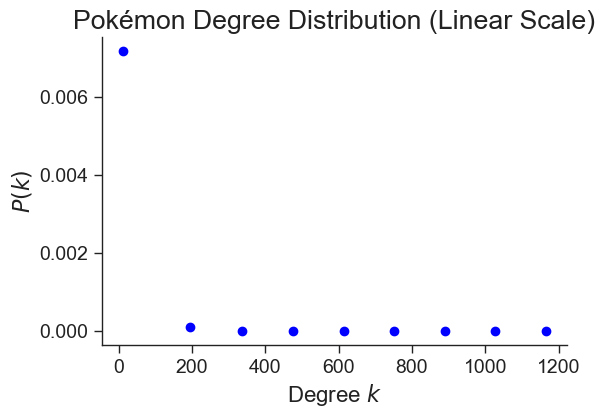

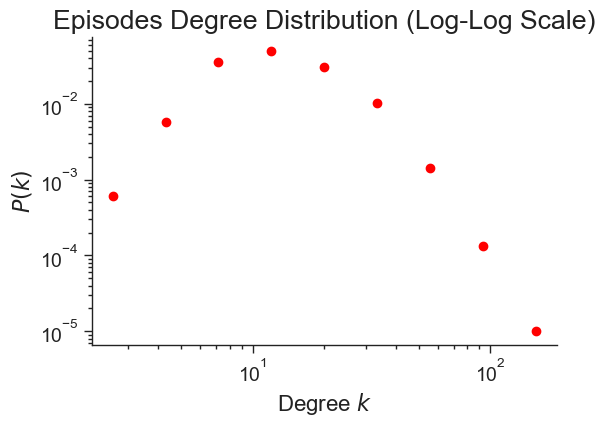

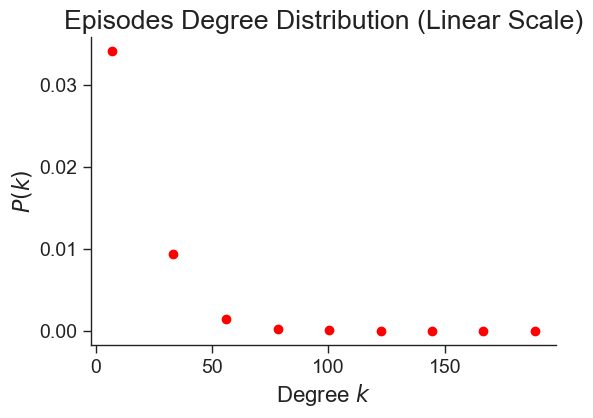

In [ ]:
# Load nodes
pokemon = pd.read_csv('../../datasets/clean/pokemon_nodes.csv')
episodes = pd.read_csv('../../datasets/clean/episode_nodes.csv')

pokemon_ids = pokemon['Id']
episode_ids = episodes['Id']
all_nodes = pd.concat([pokemon_ids, episode_ids])

G = nx.Graph()

# Read edge list
G = nx.read_edgelist('../../datasets/clean/edge_list.csv', 
                     delimiter=",",  
                     nodetype=int,    
                     encoding='utf-8', comments="Source")

G.add_nodes_from(all_nodes)

# Classify nodes
pokemon_nodes = {node for node in G.nodes if node < 10000}
episode_nodes = set(G.nodes) - pokemon_nodes

# Compute degrees
pokemon_degrees = np.array([G.degree(n) for n in pokemon_nodes])
episode_degrees = np.array([G.degree(n) for n in episode_nodes])

# Remove zero-degree nodes for log-log plotting (avoiding log(0) errors)
pokemon_degrees_nonzero = pokemon_degrees[pokemon_degrees > 0]
episode_degrees_nonzero = episode_degrees[episode_degrees > 0]

# Define function to plot both log-log and linear distributions
def plot_degree_distribution(degrees, title, color):
    if len(degrees) == 0:
        print(f"No nodes with nonzero degree for {title}. Skipping plot.")
        return

    kmin, kmax = degrees.min(), degrees.max()
    kmin = max(kmin, 1)  # Ensure kmin is at least 1 to avoid log(0)

    # Log-log plot
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.loglog(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Log-Log Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

    # Linear plot
    bin_edges = np.linspace(kmin, kmax, num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.plot(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Linear Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

# Plot for Pokémon (excluding zero-degree nodes for log-log)
plot_degree_distribution(pokemon_degrees_nonzero, "Pokémon", "blue")

# Plot for Episodes (excluding zero-degree nodes for log-log)
plot_degree_distribution(episode_degrees_nonzero, "Episodes", "red")


In [103]:
# print summary

# create graph without zero-degree nodes
Temp_G = G.copy()
for node in G.nodes():
    if G.degree(node) == 0:
        Temp_G.remove_node(node)

# Find nodes with highest degree 
max_degree_pokemon_id = max(pokemon_nodes, key=lambda n: G.degree(n))
max_degree = G.degree(max_degree_pokemon_id)

max_degree_pokemon_name = pokemon.loc[pokemon['Id'] == max_degree_pokemon_id, 'Label'].iloc[0]

max_degree_episode_id = max(episode_nodes, key=lambda n: G.degree(n))
max_degree_episode = G.degree(max_degree_episode_id)

max_degree_episode_name = episodes.loc[episodes['Id'] == max_degree_episode_id, 'Label'].iloc[0]


# Filter out nodes with degree 0
pokemon_nodes_filtered = {node for node in pokemon_nodes if G.degree(node) > 0}

# Find the Pokémon with the lowest degree
min_degree_pokemon_id = min(pokemon_nodes_filtered, key=lambda n: G.degree(n))
min_degree_pokemon = G.degree(min_degree_pokemon_id)

# Access the Pokémon name using the ID from the DataFrame
min_degree_pokemon_name = pokemon.loc[pokemon['Id'] == min_degree_pokemon_id, 'Label'].iloc[0]

# Find the Episode with the lowest degree
min_degree_episode_id = min(episode_nodes, key=lambda n: G.degree(n))
min_degree_episode = G.degree(min_degree_episode_id)

# Access the episode name using the ID from the DataFrame
min_degree_episode_name = episodes.loc[episodes['Id'] == min_degree_episode_id, 'Label'].iloc[0]

print("Number of Pokémon:", len(pokemon))
print("Number of Episodes:", len(episodes))

print("\nAverage Pokémon Degree:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")
print("Average Episode Degree:", np.mean(episode_degrees) if len(episode_degrees) > 0 else "N/A")

print(f"\nHighest Pokemon degree ({max_degree_pokemon_name}): {max_degree}")
print(f"Highest episode degree ({max_degree_episode_id - 10000}, {max_degree_episode_name}): {max_degree_episode}")

print(f"\nLowest Pokemon degree (excluding degree 0) is ({min_degree_pokemon_name}): {min_degree_pokemon}")
print(f"Lowest episode degree is ({min_degree_episode_id - 10000}, {min_degree_episode_name}): {min_degree_episode}")

print(f"\nAverage path length: {nx.average_shortest_path_length(Temp_G)}")

Number of Pokémon: 905
Number of Episodes: 1236

Average Pokémon Degree: 26.770165745856353
Average Episode Degree: 19.601132686084142

Highest Pokemon degree (Pikachu): 1235
Highest episode degree (1225, Ash and Goh! Setting Off Anew!!): 200

Lowest Pokemon degree (excluding degree 0) is (Eelektrik): 1
Lowest episode degree is (39, Forest of Pikachu): 2

Average path length: 2.7112758491404763


In [64]:
cc = list(nx.connected_components(G))
print(len(cc))

# print(f"\nNumber of connected components: {len(list(cc))}")
largest_cc = max(nx.connected_components(G), key=len)
print(f"\nLargest connected component: {len(largest_cc)}")

31

Largest connected component: 2111


In [ ]:
from networkx.algorithms import bipartite

clustering = bipartite.clustering(G, nodes = pokemon_nodes)
print(clustering)

{1: 0.02967688371823452, 2: 0.03729736196900463, 3: 0.028941597118476943, 4: 0.03410122450576113, 5: 0.032424437789345825, 6: 0.03365797154445911, 7: 0.030258294940985322, 8: 0.034698349399507694, 9: 0.03106518552524864, 10: 0.04120724965281663, 11: 0.04446808034270836, 12: 0.03777274367451398, 13: 0.045639208579432475, 14: 0.051600965220265554, 15: 0.03408492479154469, 16: 0.036893203051240775, 17: 0.03550090617084499, 18: 0.041671315942850166, 19: 0.03629396496575088, 20: 0.04302383013693664, 21: 0.040633077707636016, 22: 0.02935298583415969, 23: 0.04588709546248531, 24: 0.02720727557909752, 25: 0.02127135679024745, 26: 0.038463004292323986, 27: 0.03461117425153391, 28: 0.03463638062353229, 29: 0.04770888095342082, 30: 0.03593414548646573, 31: 0.03955537178276297, 32: 0.046959073223167565, 33: 0.03925318390016304, 34: 0.035309723597228566, 35: 0.03204952615271635, 36: 0.039813215490820945, 37: 0.039412811042328924, 38: 0.03772785572079678, 39: 0.032339043340406035, 40: 0.034266838931

In [121]:
# create projected graph of pokemon nodes
P = bipartite.weighted_projected_graph(G, pokemon_nodes)
p_nodes = list(P.nodes())
e_edges = list(P.edges(data=True))

edges_data = []
for edge in e_edges:
    source, target, data = edge
    weight = int(data['weight'])  # Convert weight to integer
    edges_data.append([source, target, weight])

# Create the DataFrame
p_edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])

# Save the DataFrame to a CSV file
p_edges_df.to_csv('../../datasets/clean/projected_edges.csv', index=False)

print("CSV file 'projected_edges.csv' has been created.")




CSV file 'projected_edges.csv' has been created.


In [ ]:
# compute clustering coefficient
clustering = nx.clustering(P)
print(clustering)

avg_clustering = nx.average_clustering(P)
print(avg_clustering)

{1: 0.4648731884057971, 2: 0.5609165462648298, 3: 0.6297766889132945, 4: 0.5833605646689759, 5: 0.7074784147068438, 6: 0.3995903928504934, 7: 0.501315885132679, 8: 0.7360147942672215, 9: 0.5307000094723879, 10: 0.49225682290792144, 11: 0.6431294707156776, 12: 0.46140786436499587, 13: 0.5626590836780146, 14: 0.6457598266790467, 15: 0.539414553700268, 16: 0.5131920862247158, 17: 0.622930174563591, 18: 0.6430245877620608, 19: 0.47328414934048735, 20: 0.6001588246972405, 21: 0.5223146105548956, 22: 0.5702196578601073, 23: 0.6185966594741469, 24: 0.604718249602738, 25: 0.27952220308727893, 26: 0.5101063044441163, 27: 0.5780575775460686, 28: 0.6819711277542603, 29: 0.5989003963687508, 30: 0.7368945130173219, 31: 0.7771673729922043, 32: 0.5837674924092188, 33: 0.828703284770609, 34: 0.6713915452676736, 35: 0.5701368570080226, 36: 0.607429523677267, 37: 0.46355072463768116, 38: 0.5839114515585104, 39: 0.5261926074352679, 40: 0.5049147346993735, 41: 0.5778985322206674, 42: 0.5501294973008394, 4

In [ ]:
degree_centrality = nx.degree_centrality(P)

# Sort Pokémon by degree centrality (most connected)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top 10 Pokémon by degree centrality
print(f"Top 10 Pokemon by degree centrality: {sorted_degree[:10]}")

betweenness_centrality = nx.betweenness_centrality(P)

# Sort Pokémon by betweenness centrality (most important intermediaries)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top 10 Pokémon by betweenness centrality
print(f"Top 10 Pokemon by betweeness centrality: {sorted_betweenness[:10]}")

closeness_centrality = nx.closeness_centrality(P)

# Sort Pokémon by closeness centrality (most central to the entire network)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top 10 Pokémon by closeness centrality
print(f"Top 10 Pokemon by closeness centraility: {sorted_closeness[:10]}")



Top 10 Pokemon by degree centrality: [(25, 0.9668141592920354), (52, 0.9269911504424778), (202, 0.8716814159292036), (479, 0.831858407079646), (133, 0.7765486725663717), (54, 0.7345132743362832), (6, 0.7256637168141593), (149, 0.6747787610619469), (448, 0.6703539823008849), (58, 0.6592920353982301)]
Top 10 Pokemon by betweeness centrality: [(25, 0.03742799042572964), (52, 0.024262532483885154), (479, 0.01599170098288389), (202, 0.015509736348656211), (133, 0.008908059615455315), (6, 0.007540705075161739), (54, 0.00644835013959307), (149, 0.006137272704798065), (448, 0.0059380487303198485), (810, 0.005890897726994667)]
Top 10 Pokemon by closeness centraility: [(25, 0.9668141592920354), (52, 0.9285665661771857), (202, 0.8802037241887906), (479, 0.8483891317482319), (133, 0.8078351579552954), (54, 0.7795162133037259), (6, 0.7738054718143215), (149, 0.7425268675054824), (448, 0.739926072873239), (58, 0.7335031034906588)]


In [ ]:
weighted_degree_centrality = nx.degree_centrality(P)
print(f"Top 10 Pokemon by weighted degree centrality: {sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]}")



Top 10 Pokemon by weighted degree centrality: [(25, 0.9668141592920354), (52, 0.9269911504424778), (202, 0.8716814159292036), (479, 0.831858407079646), (133, 0.7765486725663717), (54, 0.7345132743362832), (6, 0.7256637168141593), (149, 0.6747787610619469), (448, 0.6703539823008849), (58, 0.6592920353982301)]


In [139]:
# Example: Filter high-rated episodes
# high_rated_episodes = [episode for episode in episode_nodes if episode_ratings[episode] > threshold]

high_rated_episodes = episodes[episodes['rating'] >= 8.5]
high_rated_episode_ids = set(high_rated_episodes['Id'])

degree_centrality = nx.degree_centrality(G)

# Extract the degree centrality for episodes only (filter out Pokémon nodes)
high_rated_degrees = {episode: degree_centrality[episode] for episode in high_rated_episode_ids if episode in degree_centrality}

# Sort episodes by degree centrality
sorted_high_rated_degrees = sorted(high_rated_degrees.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 episodes by degree centrality
print(sorted_high_rated_degrees[:10])

[(11225, 0.09345794392523366), (11221, 0.04252336448598131), (10985, 0.038317757009345796), (11214, 0.02897196261682243), (11218, 0.028037383177570093), (11087, 0.02710280373831776), (11220, 0.02710280373831776), (11213, 0.025233644859813085), (11236, 0.024299065420560748), (11219, 0.021962616822429906)]


In [163]:
# treecko progression

treeck_evo = {252, 253, 254}
T1 = G.copy()
T1.remove_nodes_from([node for node in G.nodes() if node not in treeck_evo and node not in range(10277, 10317)])

centrality = nx.degree_centrality(T1)
print(f"Treekco centrality season 6: {centrality[252]}")
print(f"Grovyle centrality season 6: {centrality[253]}")
print(f"Sceptile centrality season 6: {centrality[254]}")

T2 = G.copy()
T2.remove_nodes_from([node for node in G.nodes() if node not in treeck_evo and node not in range(10317, 10369)])

centrality = nx.degree_centrality(T2)
print(f"\nTreekco centrality season 7: {centrality[252]}")
print(f"Grovyle centrality season 7: {centrality[253]}")
print(f"Sceptile centrality season 7: {centrality[254]}")

T3 = G.copy()
T3.remove_nodes_from([node for node in G.nodes() if node not in treeck_evo and node not in range(10369, 10422)])

centrality = nx.degree_centrality(T3)
print(f"\nTreekco centrality season 8: {centrality[252]}")
print(f"Grovyle centrality season 8: {centrality[253]}")
print(f"Sceptile centrality season 8: {centrality[254]}")

T4 = G.copy()
T4.remove_nodes_from([node for node in G.nodes() if node not in treeck_evo and node not in range(10422, 10469)])

centrality = nx.degree_centrality(T4)
print(f"\nTreekco centrality season 9: {centrality[252]}")
print(f"Grovyle centrality season 9: {centrality[253]}")
print(f"Sceptile centrality season 9: {centrality[254]}")



Treekco centrality season 6: 0.5476190476190476
Grovyle centrality season 6: 0.0
Sceptile centrality season 6: 0.0

Treekco centrality season 7: 0.2222222222222222
Grovyle centrality season 7: 0.2222222222222222
Sceptile centrality season 7: 0.0

Treekco centrality season 8: 0.01818181818181818
Grovyle centrality season 8: 0.41818181818181815
Sceptile centrality season 8: 0.05454545454545454

Treekco centrality season 9: 0.0
Grovyle centrality season 9: 0.1020408163265306
Sceptile centrality season 9: 0.2857142857142857
